Unsaturated SMILES:  OC1=CN=CC=N1
Saturated SMILES:  OC1CNCCN1
deltaH: 45.09
%wt H2: 5.92


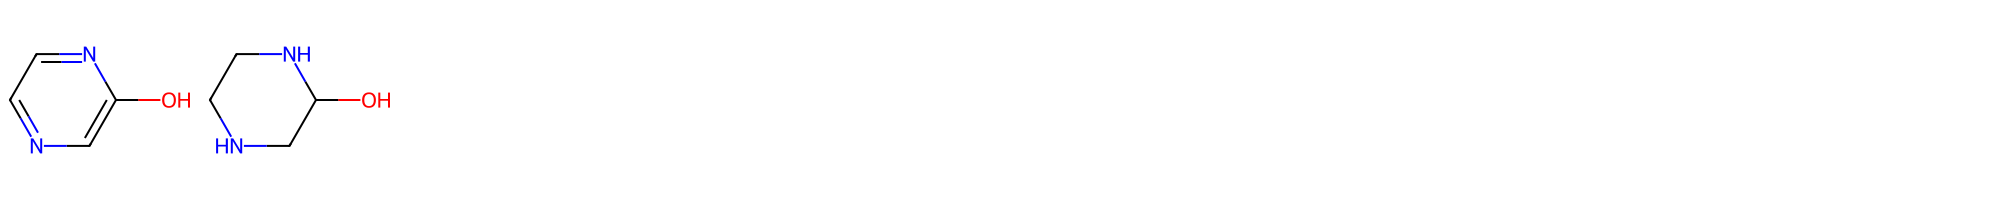

In [41]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem import Draw
import numpy as np
# Load the dataset (make sure to replace 'path_to_csv' with the actual path to your CSV file)
QM9_G4MP2_all = pd.read_csv('QM9_G4MP2_all.csv')


# Define your ranges for delta_H, pH2, and molar_mass
delta_H_range = (40, 70)
pH2_range = (5.5, 7)
molar_mass_range = (50, 100)

# Filter the dataset based on the specified ranges
filtered_data = QM9_G4MP2_all[
    (QM9_G4MP2_all['delta_H'].between(*delta_H_range)) &
    (QM9_G4MP2_all['pH2'].between(*pH2_range)) &
    (QM9_G4MP2_all['molar_mass'].between(*molar_mass_range))
]

# Take a random sample of 10 rows from the filtered data if there are more than 10
if len(filtered_data) > 1:
    filtered_data = filtered_data.sample(n=1)

# Rename columns to match the desired output format and only select the relevant columns
result_table = filtered_data[['unsat_SMILE', 'sat_SMILE', 'delta_H', 'pH2']]
result_table.columns = ['molecule1', 'molecule2', 'deltaH', '%wt H2']

# Function to display molecule images from SMILES strings
def display_molecules(smiles_list):
    molecules = [Chem.MolFromSmiles(smile) for smile in smiles_list]
    img = Draw.MolsToGridImage(molecules, molsPerRow=10, subImgSize=(200, 200), useSVG=True)
    return img

# Apply this function to the 'unsat_SMILE' column of the result_table
for idx, row in result_table.iterrows():
    img = display_molecules([row['molecule1'], row['molecule2']])
    print("Unsaturated SMILES: ", row['molecule1'])
    print("Saturated SMILES: ", row['molecule2'])

    print(f"deltaH: {np.around(row['deltaH'],2)}"),
    print(f"%wt H2: {np.around(row['%wt H2'],2)}")

img